# EDA

In [12]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

In [14]:
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=5000)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2


In [15]:
data = yf.download('HDFCBANK.NS', start=start_date, end=end_date, progress=False)

In [16]:
data.shape

(3380, 6)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3380 entries, 2009-06-29 to 2023-03-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3380 non-null   float64
 1   High       3380 non-null   float64
 2   Low        3380 non-null   float64
 3   Close      3380 non-null   float64
 4   Adj Close  3380 non-null   float64
 5   Volume     3380 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 184.8 KB


In [18]:
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", 
             "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3375,2023-02-27,1585.900024,1599.000000,1577.300049,1592.900024,1592.900024,7156486
3376,2023-02-28,1592.000000,1605.300049,1588.699951,1599.599976,1599.599976,9496996
3377,2023-03-01,1612.000000,1613.000000,1595.750000,1598.050049,1598.050049,7068628
3378,2023-03-02,1594.000000,1605.949951,1582.000000,1584.449951,1584.449951,8695907
3379,2023-03-03,1596.000000,1620.000000,1588.000000,1615.900024,1615.900024,7493117


In [19]:
data


,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-06-29,150.500000,153.289993,149.199997,150.779999,137.684326,18100240
1,2009-06-30,152.395004,152.500000,147.925003,149.315002,136.346558,10292420
2,2009-07-01,149.800003,151.800003,148.315002,150.250000,137.200348,5927280
3,2009-07-02,150.899994,150.899994,146.524994,150.050003,137.017715,6792600
4,2009-07-03,148.990005,152.500000,148.300003,151.574997,138.410263,9805270
...,...,...,...,...,...,...,...
3375,2023-02-27,1585.900024,1599.000000,1577.300049,1592.900024,1592.900024,7156486
3376,2023-02-28,1592.000000,1605.300049,1588.699951,1599.599976,1599.599976,9496996
3377,2023-03-01,1612.000000,1613.000000,1595.750000,1598.050049,1598.050049,7068628
3378,2023-03-02,1594.000000,1605.949951,1582.000000,1584.449951,1584.449951,8695907


In [20]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], 
                                        high=data["High"],
                                        low=data["Low"], 
                                        close=data["Close"])])
figure.update_layout(title = "HDFC Bank Stock Price Analysis", 
                     xaxis_rangeslider_visible=False)
figure.show()

In [21]:
correlation = data.corr()
print(correlation["Close"].sort_values(ascending=False))

Close        1.000000
Adj Close    0.999909
High         0.999875
Low          0.999847
Open         0.999709
Volume       0.099975
Name: Close, dtype: float64


In [22]:
x=data[['Volume','Open']]
y=data['Close']

In [23]:
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()



# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
data = pd.DataFrame(data={"Predicted Rate": ypred})
print(data.head())

   Predicted Rate
0      203.860001
1      237.259995
2      235.975006
3      335.174988
4      515.974976


# Prohet

In [27]:
data = yf.download('HDFCBANK.NS', start=start_date, end=end_date, progress=False)

In [28]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

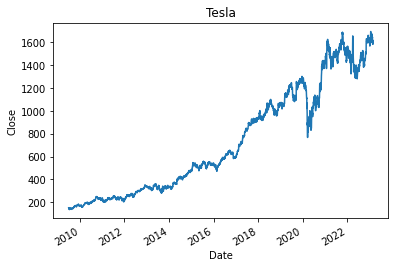

In [30]:
close = data['Close']
ax = close.plot(title='Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

In [31]:
data = yf.download('HDFCBANK.NS', start=start_date, end=end_date, progress=False)

In [32]:
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", 
             "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3375,2023-02-27,1585.900024,1599.000000,1577.300049,1592.900024,1592.900024,7156486
3376,2023-02-28,1592.000000,1605.300049,1588.699951,1599.599976,1599.599976,9496996
3377,2023-03-01,1612.000000,1613.000000,1595.750000,1598.050049,1598.050049,7068628
3378,2023-03-02,1594.000000,1605.949951,1582.000000,1584.449951,1584.449951,8695907
3379,2023-03-03,1596.000000,1620.000000,1588.000000,1615.900024,1615.900024,7493117


In [33]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-06-29,150.500000,153.289993,149.199997,150.779999,137.684326,18100240
1,2009-06-30,152.395004,152.500000,147.925003,149.315002,136.346588,10292420
2,2009-07-01,149.800003,151.800003,148.315002,150.250000,137.200363,5927280
3,2009-07-02,150.899994,150.899994,146.524994,150.050003,137.017731,6792600
4,2009-07-03,148.990005,152.500000,148.300003,151.574997,138.410278,9805270
...,...,...,...,...,...,...,...
3375,2023-02-27,1585.900024,1599.000000,1577.300049,1592.900024,1592.900024,7156486
3376,2023-02-28,1592.000000,1605.300049,1588.699951,1599.599976,1599.599976,9496996
3377,2023-03-01,1612.000000,1613.000000,1595.750000,1598.050049,1598.050049,7068628
3378,2023-03-02,1594.000000,1605.949951,1582.000000,1584.449951,1584.449951,8695907


In [34]:
data["Date"] = pd.to_datetime(data["Date"], infer_datetime_format=True)


In [35]:
data = data[["Date", "Close"]]

In [36]:
data = data.rename(columns={"Date" : "ds", "Close" : "y" })


In [37]:
model = Prophet()
model.fit(data)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp64hu6e5p/4qe11aqt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp64hu6e5p/obr_yt2g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62227', 'data', 'file=/tmp/tmp64hu6e5p/4qe11aqt.json', 'init=/tmp/tmp64hu6e5p/obr_yt2g.json', 'output', 'file=/tmp/tmp64hu6e5p/prophet_model9y3zzkp5/prophet_model-20230306134721.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:47:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:47:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
3740,2024-02-27,1783.805424,1681.621497,1883.780380
3741,2024-02-28,1781.731507,1675.240317,1878.086556
3742,2024-02-29,1781.498691,1680.266247,1889.004789
3743,2024-03-01,1779.747419,1674.939879,1880.863159
3744,2024-03-02,1859.074926,1755.768108,1955.117702


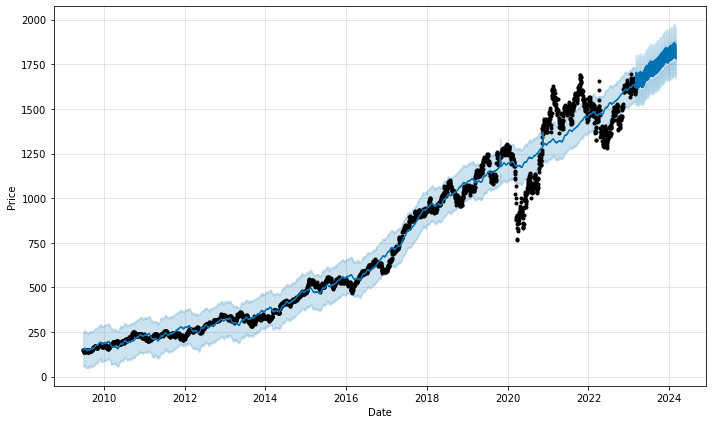

In [38]:
graph = model.plot(forcast, xlabel="Date", ylabel="Price")